In [10]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

import util

## 4.1.1 Normal by Addition

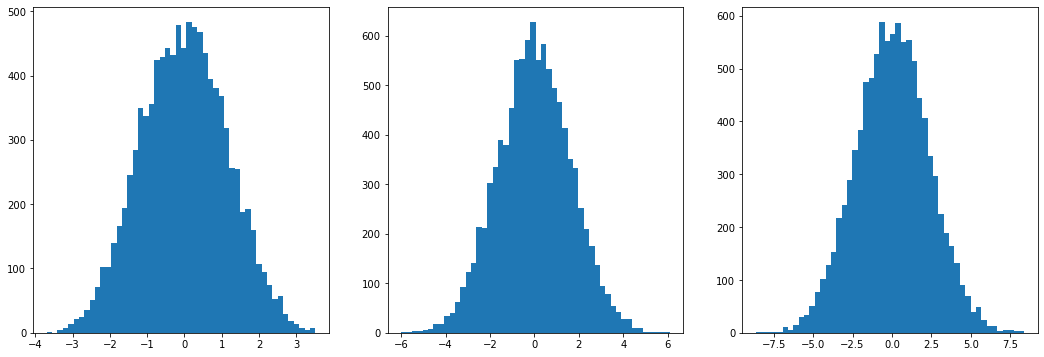

In [11]:
rng = np.random.RandomState(42)

fig, axs = plt.subplots(1, 3, figsize=(18, 6)) 

for i, n_steps in enumerate([4, 8, 16]):
    pos = rng.uniform(-1, 1, size=(10000, n_steps))
    
    ax = axs[i]
    ax.hist(pos.sum(-1), bins=50)

# 4.3 Gaussian model of height

In [12]:
df = pl.read_csv("howell1.csv", sep=";")
print(util.summarize(df))

[pl.DataFrame of shape (544, 4):
┌────────┬───────┬───────────┬────────────┬───────────┬──────────┬───────────┬──────────────────┐
│ column ┆ dtype ┆ median    ┆ mean       ┆ std       ┆ 5.5%     ┆ 94.5%     ┆ histogram        │
│ ---    ┆ ---   ┆ ---       ┆ ---        ┆ ---       ┆ ---      ┆ ---       ┆ ---              │
│ str    ┆ str   ┆ f64       ┆ f64        ┆ f64       ┆ f64      ┆ f64       ┆ str              │
╞════════╪═══════╪═══════════╪════════════╪═══════════╪══════════╪═══════════╪══════════════════╡
│ height ┆ f64   ┆ 148.59    ┆ 138.263596 ┆ 27.602448 ┆ 81.10855 ┆ 165.735   ┆     ▁  ▁▁▁▁▄█▆▂  │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ weight ┆ f64   ┆ 40.057844 ┆ 35.610618  ┆ 14.719178 ┆ 9.360721 ┆ 54.502894 ┆ ▁▂▄▂▂▁▁▁▄▆█▇▅▃▁  │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ age    ┆ f64   ┆ 27.0      ┆ 29.344393  ┆ 20.746888 ┆ 1.0      ┆ 66.135    ┆ █▄▅▄▅▄

In [13]:
d2 = df.filter(pl.col('age') >= 18)
print(util.summarize(d2))

[pl.DataFrame of shape (352, 4):
┌────────┬───────┬──────────┬────────────┬───────────┬───────────┬───────────┬──────────────────┐
│ column ┆ dtype ┆ median   ┆ mean       ┆ std       ┆ 5.5%      ┆ 94.5%     ┆ histogram        │
│ ---    ┆ ---   ┆ ---      ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---              │
│ str    ┆ str   ┆ f64      ┆ f64        ┆ f64       ┆ f64       ┆ f64       ┆ str              │
╞════════╪═══════╪══════════╪════════════╪═══════════╪═══════════╪═══════════╪══════════════════╡
│ height ┆ f64   ┆ 154.305  ┆ 154.597093 ┆ 7.742332  ┆ 142.875   ┆ 167.005   ┆  ▁▃▄▆█▅▅▅▆▃▁▁    │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ weight ┆ f64   ┆ 44.79221 ┆ 44.990486  ┆ 6.456708  ┆ 35.137504 ┆ 55.765876 ┆ ▁▁▄▄▅▆▆▅█▄▃▂▃    │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ age    ┆ f64   ┆ 39.0     ┆ 41.138494  ┆ 15.967855 ┆ 20.0      ┆ 70.0      ┆ ▆▅▇▄▄█

## 4.3.5 Finding the posterior distribution with quap

In [14]:
import jax
import numpyro
import numpyro.distributions as dist
from numpyro.infer import Predictive, SVI, Trace_ELBO, init_to_value
from numpyro.infer.autoguide import AutoLaplaceApproximation
import numpyro.optim as optim


def flist(height):
    mu = numpyro.sample("mu", dist.Normal(178, 20))
    sigma = numpyro.sample("sigma", dist.Uniform(0, 50))
    numpyro.sample("height", dist.Normal(mu, sigma), obs=height)
    
m4_1 = AutoLaplaceApproximation(flist)
svi = SVI(flist, m4_1, optim.Adam(1), Trace_ELBO(), height=d2['height'].to_numpy())
svi_result = svi.run(jax.random.PRNGKey(0), 2000)
p4_1 = svi_result.params

100%|██████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 4563.39it/s, init loss: 4000.1155, avg. loss [1901-2000]: 1226.0389]


In [15]:
samples = m4_1.sample_posterior(jax.random.PRNGKey(1), p4_1, (10000,))
samples = pl.DataFrame({k: np.array(v) for k, v in samples.items()})
print(util.summarize(samples))

[pl.DataFrame of shape (10000, 2):
┌────────┬───────┬────────────┬────────────┬──────────┬────────────┬────────────┬──────────────────┐
│ column ┆ dtype ┆ median     ┆ mean       ┆ std      ┆ 5.5%       ┆ 94.5%      ┆ histogram        │
│ ---    ┆ ---   ┆ ---        ┆ ---        ┆ ---      ┆ ---        ┆ ---        ┆ ---              │
│ str    ┆ str   ┆ f32        ┆ f64        ┆ f32      ┆ f32        ┆ f32        ┆ str              │
╞════════╪═══════╪════════════╪════════════╪══════════╪════════════╪════════════╪══════════════════╡
│ mu     ┆ f32   ┆ 154.605164 ┆ 154.608674 ┆ 0.412593 ┆ 153.949341 ┆ 155.268768 ┆    ▁▂▅▇█▇▅▃▁     │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ sigma  ┆ f32   ┆ 7.739341   ┆ 7.745559   ┆ 0.291966 ┆ 7.286161   ┆ 8.225402   ┆    ▂▄▆█▇▆▃▁      │
└────────┴───────┴────────────┴────────────┴──────────┴────────────┴────────────┴──────────────────┘
